# Exloring datasets for University of Ottawa

<div style='background:#e7edf7'>
    Query the OpenAlex API to answer the question:
    <blockquote>
        <b><i>How many datasets from University of Ottawa have been published in recent years? How many are "open" according to OpenAlex?</i></b>
    </blockquote>
   </div>
<br>

Let's start by dividing the process into smaller, more manageable steps:
1. First we need to get all recent datasets from University of Ottawa.
2. Where are these datasets (HostVenue) - what can we learn?
3. How are they "open"? What data usage license are most common?
4. Additionally we can put the numbers into a plot to visualize our findings.

---

In [2]:
import pandas as pd
import numpy as np
import requests    # module for executing API calls

## 1. Get all recent datasets from University of Ottawa.

 --> We want to query for "_all recent datasets from University of Ottawa_", so we will filter for the works that:
    * were published in the last 10 years (=recent):  
    `from_publication_date:2012-08-01`
    * are specified as datasets:   
    `type:Dataset`,
    * have at least one [authorship](https://docs.openalex.org/about-the-data/work#authorships) affiliation with University of Ottawa:  
   `institutions.ror:https://ror.org/03c4mmv16`,
    * are not [paratext](https://docs.openalex.org/about-the-data/work#is_paratext):  
   `is_paratext:false`,

Now we need to put the URL together from these parts as follows:  
* Starting with the base URL "`https://api.openalex.org/`", we add the entity type to it : "`https://api.openalex.org/institution`"
* All criteria need to go into the query parameter `filter` that is added after a question mark: "`https://api.openalex.org/works?filter=`"
* Finally we take the criteria we specified before and concatenate them using commas as separators. This will be our `filter` value: "`https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,type:Dataset,from_publication_date:2012-07-20,is_paratext:false`"

With this URL we can get all recent datasets from University of Ottawa!

In [3]:
# build the 'filter' parameter
filter_by_institution_id = 'institutions.ror:https://ror.org/03c4mmv16'
filter_by_paratext = 'is_paratext:false'
filter_by_type = 'type:Dataset'
filter_by_publication_date = 'from_publication_date:2012-07-20'

all_filters = (filter_by_institution_id, filter_by_paratext, filter_by_type, filter_by_publication_date)
filter_param = f'filter={",".join(all_filters)}'
print(f'filter query parameter:\n  {filter_param}')

# put the URL together
filtered_works_url = f'https://api.openalex.org/works?{filter_param}'
print(f'complete URL:\n  {filtered_works_url} ...')

filter query parameter:
  filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20
complete URL:
  https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20 ...


In [9]:
response_meta = requests.get(
    'https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20'
).json()['meta']

print(response_meta['count'])

132


Comparable results for uOttawa from DataCite Commons, a web search interface for the PID Graph, the graph formed by the collection of scholarly resources such as publications, datasets, people and research organizations, and their connections.  DataCite commons results 130 datasets for the last 10 years for University of Ottawa.

## 2. Where are datasets being published?
The host_venue is important because it describes where you can find the "best" (closest to the version of record) copy of this work. A sub property of host_venue is publisher (there is a sub property of venue as type (e.g. repository, publisher, etc), but it does not seem to be a group_by property. Let's see what we get when we further filter our data by host_venue.publisher


In [21]:
group_by_param = 'group_by=host_venue.publisher'

work_groups_url = f'{filtered_works_url}&{group_by_param}'
print(f'complete URL with group_by:\n  {work_groups_url}')

complete URL with group_by:
  https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20&group_by=host_venue.publisher


In [22]:
response_meta = requests.get(
    'https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20&group_by=host_venue.publisher').json()['meta']

print(response_meta['count'])


2


The results return are 2. So am I to understand that there are only 2 publishers for UofO data? Would be interesting to see if this is a journal. Querying DataCite commons, we can see that for the 130 results, most have been published in data repositories, such as Dryad, 

## 3. Let's try to group by Publication year.
For /works group_by attributes include publication_year

In [25]:
group_by_param = 'group_by=publication_year'

work_groups_url = f'{filtered_works_url}&{group_by_param}'
print(f'complete URL with group_by:\n  {work_groups_url}')

complete URL with group_by:
  https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20&group_by=publication_year


In [26]:
response_meta = requests.get(
    'https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20&group_by=publication_year').json()['meta']

print(response_meta['count'])

11


In [27]:
import requests, json
response = requests.get(work_groups_url)
work_groups = response.json()['group_by']
print(json.dumps(work_groups, indent=2))

[
  {
    "key": "2013",
    "key_display_name": "2013",
    "count": 29
  },
  {
    "key": "2019",
    "key_display_name": "2019",
    "count": 28
  },
  {
    "key": "2016",
    "key_display_name": "2016",
    "count": 21
  },
  {
    "key": "2015",
    "key_display_name": "2015",
    "count": 16
  },
  {
    "key": "2014",
    "key_display_name": "2014",
    "count": 11
  },
  {
    "key": "2020",
    "key_display_name": "2020",
    "count": 7
  },
  {
    "key": "2012",
    "key_display_name": "2012",
    "count": 6
  },
  {
    "key": "2017",
    "key_display_name": "2017",
    "count": 5
  },
  {
    "key": "2021",
    "key_display_name": "2021",
    "count": 4
  },
  {
    "key": "2022",
    "key_display_name": "2022",
    "count": 3
  },
  {
    "key": "2018",
    "key_display_name": "2018",
    "count": 2
  }
]


In [28]:
work_groups

[{'key': '2013', 'key_display_name': '2013', 'count': 29},
 {'key': '2019', 'key_display_name': '2019', 'count': 28},
 {'key': '2016', 'key_display_name': '2016', 'count': 21},
 {'key': '2015', 'key_display_name': '2015', 'count': 16},
 {'key': '2014', 'key_display_name': '2014', 'count': 11},
 {'key': '2020', 'key_display_name': '2020', 'count': 7},
 {'key': '2012', 'key_display_name': '2012', 'count': 6},
 {'key': '2017', 'key_display_name': '2017', 'count': 5},
 {'key': '2021', 'key_display_name': '2021', 'count': 4},
 {'key': '2022', 'key_display_name': '2022', 'count': 3},
 {'key': '2018', 'key_display_name': '2018', 'count': 2}]

In [36]:
##Let's plot this!  How to create a historgram of years?


## 4. Let's try to group by "licence".

FAIR data are data which meet principles of findability, accessibility, interoperability, and reusability. One of the guiding principles notes that data should be released with a clear and accessible data usage license.  The alternate host venue has the element "licence" so let's see what we get. 


In [13]:
group_by_param = 'group_by=alternate_host_venues.license'

work_groups_url = f'{filtered_works_url}&{group_by_param}'
print(f'complete URL with group_by:\n  {work_groups_url}')

complete URL with group_by:
  https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20&group_by=alternate_host_venues.license


In [14]:
response_meta = requests.get(
    'https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20&group_by=alternate_host_venues.license'
).json()['meta']

print(response_meta['count'])

3


In [15]:
import requests, json
response = requests.get(work_groups_url)
work_groups = response.json()['group_by']
print(json.dumps(work_groups, indent=2))

[
  {
    "key": "unknown",
    "key_display_name": "unknown",
    "count": 130
  },
  {
    "key": "cc-by",
    "key_display_name": "cc-by",
    "count": 1
  },
  {
    "key": "cc-by-nc-sa",
    "key_display_name": "cc-by-nc-sa",
    "count": 1
  }
]


So of the 132 datasets, apparently only two have licences. Querying DataCite commons, we can see that for the 130 results, 125 have the data use licence CC0-1.0. 
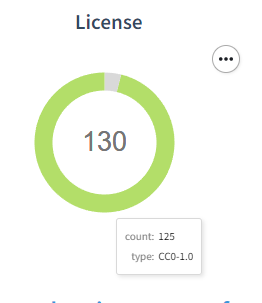

##How to display the Pandas DataFrame in table style so as to see what the 130 results are? 

## 5 What concepts are associated with datasets?
OpenAlex provides "concepts", abstract ideas that works are about, rather than say 'Field of Science'. According to the OpenAlex documentation, the tagging is done using an automated classifier that was trained on MAGâ€™s corpus.


In [23]:
group_by_param = 'group_by=concepts.id'

work_groups_url = f'{filtered_works_url}&{group_by_param}'
print(f'complete URL with group_by:\n  {work_groups_url}')

complete URL with group_by:
  https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20&group_by=concepts.id


In [24]:
response_meta = requests.get(
    'https://api.openalex.org/works?filter=institutions.ror:https://ror.org/03c4mmv16,is_paratext:false,type:Dataset,from_publication_date:2012-07-20&group_by=concepts.id'
).json()['meta']

print(response_meta['count'])

200


## Plot the data (optional).
Last but not least we can put the data into a visually appealing plot. How about a donut plot?